In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import *

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [30]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
backup_df = df

In [31]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [33]:
df[['Churn', 'gender', 'customerID']].groupby(['gender', 'Churn']).count()

customerID
gender Churn            
Female No           2549
       Yes           939
Male   No           2625
       Yes           930

In [34]:
df[['Churn', 'SeniorCitizen', 'customerID']].groupby(['SeniorCitizen', 'Churn']).count()

customerID
SeniorCitizen Churn            
0             No           4508
              Yes          1393
1             No            666
              Yes           476

In [35]:
df[['gender','SeniorCitizen','Churn', 'customerID']].groupby(['gender','SeniorCitizen', 'Churn']).count()

customerID
gender SeniorCitizen Churn            
Female 0             No           2221
                     Yes           699
       1             No            328
                     Yes           240
Male   0             No           2287
                     Yes           694
       1             No            338
                     Yes           236

In [36]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype("float")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [38]:
one_hot = pd.get_dummies(df['gender'])
df = df.drop('gender',axis = 1)
df = df.join(one_hot)
df = df.drop('Female', axis = 1)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [39]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes' : 1, 'No' : 0, 'No phone service' : 0})


df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['TechSupport'] = df['TechSupport'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})



df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0
5,9305-CDSKC,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,0
6,1452-KIOVK,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1
7,6713-OKOMC,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,0
8,7892-POOKP,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,0
9,6388-TABGU,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,1


In [40]:
one_hot = pd.get_dummies(df['InternetService'])
#one_hot = one_hot.drop('No',axis = 1)
one_hot.rename(columns={'No': 'InternetService'}, inplace=True)
df = df.drop('InternetService',axis = 1)
df = df.join(one_hot)
df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,1,0
5,9305-CDSKC,0,0,0,8,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,0,0,1,0
6,1452-KIOVK,0,0,1,22,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1,0,1,0
7,6713-OKOMC,0,0,0,10,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,0,1,0,0
8,7892-POOKP,0,1,0,28,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,0,0,1,0
9,6388-TABGU,0,0,1,62,1,0,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,1,1,0,0


In [41]:
one_hot = pd.get_dummies(df['Contract'])
df = df.drop('Contract',axis = 1)
df = df.join(one_hot)
df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService,Month-to-month,One year,Two year
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,Electronic check,29.85,29.85,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,Mailed check,56.95,1889.50,0,1,1,0,0,0,1,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,Mailed check,53.85,108.15,1,1,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,0,0,1,0,1,0,0
5,9305-CDSKC,0,0,0,8,1,1,0,0,1,0,1,1,1,Electronic check,99.65,820.50,1,0,0,1,0,1,0,0
6,1452-KIOVK,0,0,1,22,1,1,0,1,0,0,1,0,1,Credit card (automatic),89.10,1949.40,0,1,0,1,0,1,0,0
7,6713-OKOMC,0,0,0,10,0,0,1,0,0,0,0,0,0,Mailed check,29.75,301.90,0,0,1,0,0,1,0,0
8,7892-POOKP,0,1,0,28,1,1,0,0,1,1,1,1,1,Electronic check,104.80,3046.05,1,0,0,1,0,1,0,0
9,6388-TABGU,0,0,1,62,1,0,1,1,0,0,0,0,0,Bank transfer (automatic),56.15,3487.95,0,1,1,0,0,0,1,0


In [42]:
one_hot = pd.get_dummies(df['PaymentMethod'])
df = df.drop('PaymentMethod',axis = 1)
df = df.join(one_hot)
df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,0,1,0,1,0,0,0,0,1,0
6,1452-KIOVK,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.40,0,1,0,1,0,1,0,0,0,1,0,0
7,6713-OKOMC,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.90,0,0,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,0,1,0,1,0,0,0,0,1,0
9,6388-TABGU,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,3487.95,0,1,1,0,0,0,1,0,1,0,0,0


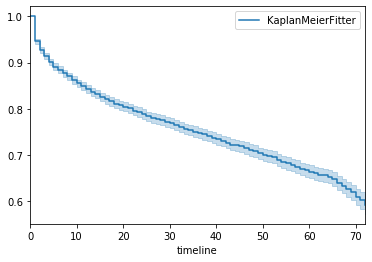

In [43]:
#fig, axes = plt.subplots(2, 3, figsize=(9, 5))

T = df['tenure']
E = df['Churn']

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
#wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
#exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
#lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
#llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
#pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
#ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

#wbf.plot_survival_function(ax=axes[0][0])
#exf.plot_survival_function(ax=axes[0][1])
#lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function() #ax=axes[1][0])
#llf.plot_survival_function(ax=axes[1][1])
#pwf.plot_survival_function(ax=axes[1][2])
#ggf.plot_survival_function(ax=axes[1][2])

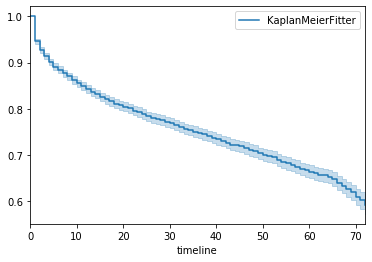

In [44]:
kmf.plot()

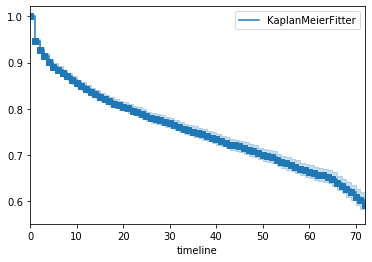

In [45]:
kmf.plot(show_censors=True, censor_styles={'ms': 6, 'marker': 's'})

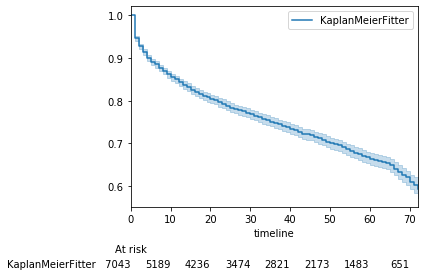

In [46]:
# Displaying at-risk counts below plots
kmf.plot(at_risk_counts=True)

In [18]:
kmf.median_survival_time_

inf

In [19]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)

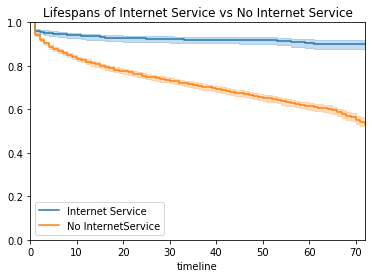

In [21]:
ax = plt.subplot(111)

dem = (df["InternetService"] == 1)

kmf.fit(T[dem], event_observed=E[dem], label="Internet Service")
kmf.plot(ax=ax)
kmf.fit(T[~dem], event_observed=E[~dem], label="No InternetService")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of Internet Service vs No Internet Service");

Often analysts want to compare the survival-ness of groups at specific times, rather than comparing the entire survival curves against each other. For example, analysts may be interested in 5-year survival. Statistically comparing the naive Kaplan-Meier points at a specific time actually has reduced power. By transforming the Kaplan-Meier curve, we can recover more power. The function lifelines.statistics.survival_difference_at_fixed_point_in_time_test() uses the log(-log) transformation implicitly and compares the survival-ness of populations at a specific point in time.

In [23]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test

point_in_time = 30
T1 = T[dem]
T2 = T[~dem]

E1=E[dem]
E2=E[~dem]

results = survival_difference_at_fixed_point_in_time_test(point_in_time, T1, T2, event_observed_A=E1, event_observed_B=E2)
results.print_summary()

<lifelines.StatisticalResult>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 30

---
 test_statistic      p  -log2(p)
         169.13 <0.005    126.04


If using lifelines for prediction work, it’s ideal that you perform some type of cross-validation scheme. This cross-validation allows you to be confident that your out-of-sample predictions will work well in practice. It also allows you to choose between multiple models.

lifelines has a built-in k-fold cross-validation function. For example, consider the following example:

In [24]:
from lifelines import AalenAdditiveFitter, CoxPHFitter
from lifelines.datasets import load_regression_dataset
from lifelines.utils import k_fold_cross_validation

df = load_regression_dataset()

#create the three models we'd like to compare.
aaf_1 = AalenAdditiveFitter(coef_penalizer=0.5)
aaf_2 = AalenAdditiveFitter(coef_penalizer=10)
cph = CoxPHFitter()

print(np.mean(k_fold_cross_validation(cph, df, duration_col='T', event_col='E')))
print(np.mean(k_fold_cross_validation(aaf_1, df, duration_col='T', event_col='E')))
print(np.mean(k_fold_cross_validation(aaf_2, df, duration_col='T', event_col='E')))

0.5738349727712011
0.5518143461692708
0.5862822108228422


In [47]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0,0,1,0


In [58]:
new_df = df.drop('customerID', axis = 1)
new_df.head(15)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,0,1,0,1,0,0,0,0,1,0
6,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.40,0,1,0,1,0,1,0,0,0,1,0,0
7,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.90,0,0,1,0,0,1,0,0,0,0,0,1
8,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,0,1,0,1,0,0,0,0,1,0
9,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,3487.95,0,1,1,0,0,0,1,0,1,0,0,0


In [59]:
new_df.drop('PhoneService', axis = 1, inplace=True)
new_df.drop('InternetService', axis = 1, inplace=True)
new_df.drop('PhoneService', axis = 1, inplace=True)
new_df.drop('InternetService', axis = 1, inplace=True)


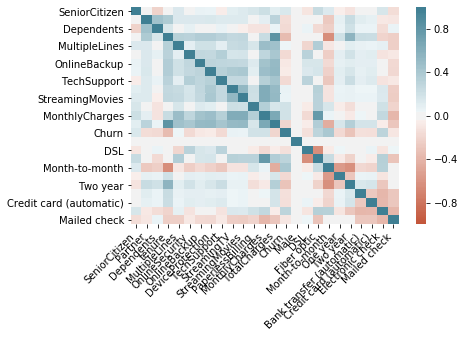

In [60]:
corr = new_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [61]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(new_df, 'tenure', event_col='Churn')
cph.print_summary()

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation:
https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
Matrix is singular.